In [1]:
%pylab nbagg
from astropy.table import Table
import sys, os, imp

# Read the qso spectrum
d = imp.find_module('linetools')[1]
T = Table.read(d + '/spectra/tests/files/q0002m422.txt.gz', 
               format='ascii', names=['wa', 'fl', 'er', 'co'])

Populating the interactive namespace from numpy and matplotlib


In [2]:
import linetools.analysis.continuum
imp.reload(linetools.analysis.continuum)
from linetools.analysis.continuum import qso_continuum

<IPython.core.display.Javascript object>


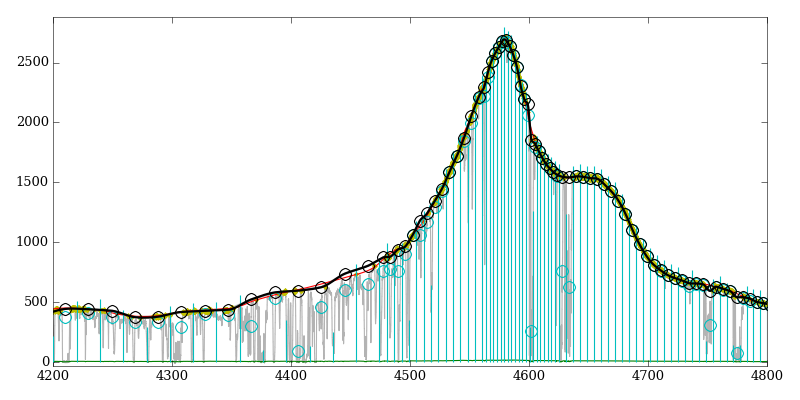

/Users/ncrighton/Code/Repo/linetools/linetools/analysis/continuum.py:245: RuntimeWarning: divide by zero encountered in true_divide
  resid = (model - s.fl) / s.er


In [3]:
# estimate a continuum

# tweak divmult and forestmult to improve the fit
redshift, divmult, forestmult = 2.76, 3.5, 3

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

co = qso_continuum(T['wa'], T['fl'], T['er'], redshift, 
                   divmult=divmult, forestmult=forestmult,
                   ax=ax)

# compare the estimated continuum (black) to the hand-fitted continuum (red).
# Black circles show the final spline knots which define the continuum, cyan 
# circles show the inital guesses

ax.plot(T['wa'], T['co'], 'r')
ax.set_xlim(4200, 4800)
y0,y1 = ax.get_ylim()
ax.set_ylim(y0, y1*1.7)
plt.tight_layout()